# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.099788e+01     6.116984e+00
 * time: 0.004317045211791992
     1     2.691010e+01     3.922713e+00
 * time: 0.012609004974365234
     2     2.254508e+01     6.512151e+00
 * time: 0.03277111053466797
     3     1.335793e+01     1.979179e+00
 * time: 0.05796694755554199
     4     1.205233e+01     1.203847e+00
 * time: 0.07844901084899902
     5     1.114881e+01     8.827009e-01
 * time: 0.09951591491699219
     6     1.076293e+01     1.207446e+00
 * time: 0.11600708961486816
     7     1.042888e+01     5.836201e-01
 * time: 0.13241910934448242
     8     1.013778e+01     5.526818e-01
 * time: 0.14917898178100586
     9     9.955479e+00     7.352275e-01
 * time: 0.16536903381347656
    10     9.818391e+00     6.283512e-01
 * time: 0.18167710304260254
    11     9.666933e+00     4.394054e-01
 * time: 0.19826793670654297
    12     9.540123e+00     6.213487e-01
 * time: 0.21120500564575195
    13     9.449217e+00     4.928176e-01
 * tim

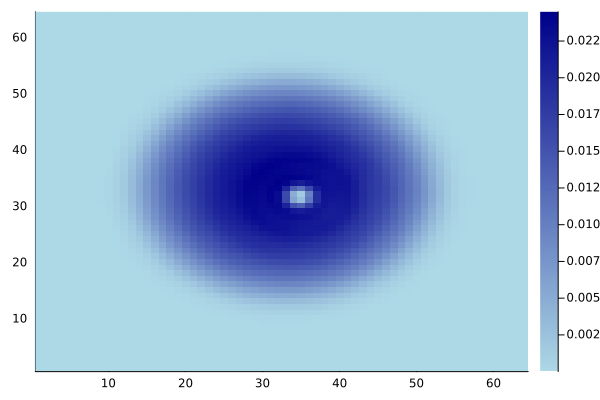

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)